In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functions import *


In [2]:
haplotype_df = pd.read_parquet('/home/jupyter-yusuf/Consensus/output/3_haplotypes.parquet')

In [3]:
haplotype_df['cnv'] = np.where(haplotype_df['haplotype'].str.contains('x') |
                      haplotype_df['haplotype'].str.contains('\+') |
                      haplotype_df['haplotype'].str.contains(r'\*5(?!\d+)'),
                      'Copy Number Variants',
                       'Single Copy')

haplotype_df.head()

,haplotype,AC,AF,AC_C,AF_C,AF_GA_C,AC_I,AF_I,AF_GA_I,AC_M,AF_M,AF_GA_M,AC_O,AF_O,AF_GA_O,activity_value,function,cnv
0,*10+*36,866,28.770764,776.0,25.780731,34.094903,10.0,0.332226,3.030303,80.0,2.657807,20.00,0.0,0.000000,0.0,0.25,Decreased function,Copy Number Variants
1,*1,834,27.707641,587.0,19.501661,25.790861,124.0,4.119601,37.575758,122.0,4.053156,30.50,1.0,0.033223,25.0,1.00,Normal function,Single Copy
2,*10,529,17.574751,413.0,13.720930,18.145870,11.0,0.365449,3.333333,105.0,3.488372,26.25,0.0,0.000000,0.0,0.25,Decreased function,Single Copy
3,*2,303,10.066445,197.0,6.544850,8.655536,66.0,2.192691,20.000000,38.0,1.262458,9.50,2.0,0.066445,50.0,1.00,Normal function,Single Copy
4,*41,142,4.717608,85.0,2.823920,3.734622,40.0,1.328904,12.121212,17.0,0.564784,4.25,0.0,0.000000,0.0,0.50,Decreased function,Single Copy


In [4]:
cn_total = haplotype_df.query('cnv == "Copy Number Variants"')['AC'].sum()

/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


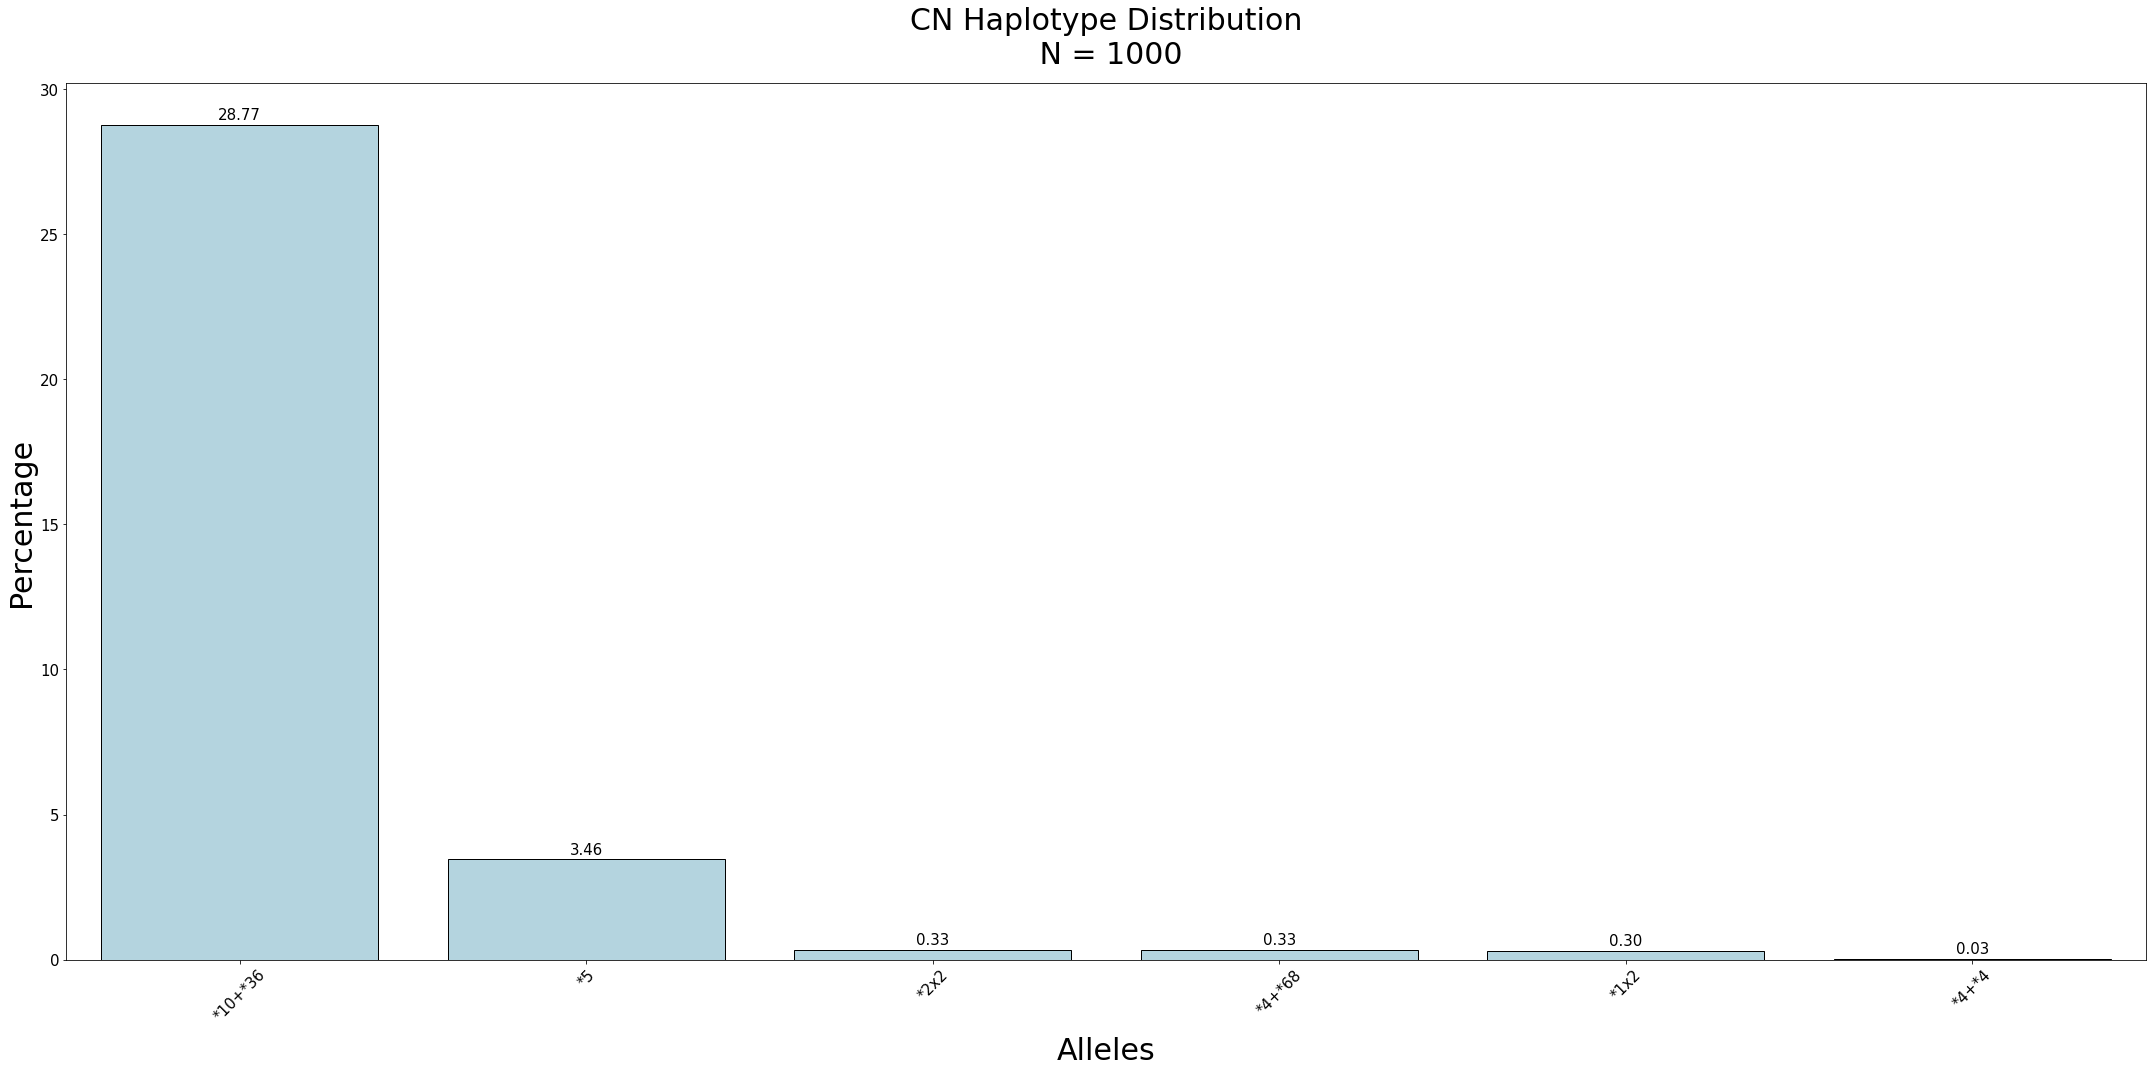

In [5]:
barplot_frequency(data = haplotype_df.query('cnv == "Copy Number Variants"'), x_col= 'haplotype', y_col = 'AF', xlabel = 'Alleles', ylabel = 'Percentage', title = f"CN Haplotype Distribution\n N = {cn_total}", figsize=(30, 15), 
                  fontsize=15, label_fontsize=30, title_fontsize=None, x_ticks_rotation=True, 
                  ylim=None, legend=None, color='#ADD8E6', ci=None, 
                  colored_xticks=False, color_col=None, hue= None, palette= None, grid=False)

# CNV haplotype distribution among genetic ancestry

In [6]:
data = pd.melt(haplotype_df, id_vars=['haplotype', 'activity_value', 'function','cnv'], value_vars=['AF_GA_C', 'AF_GA_I', 'AF_GA_M'], var_name='genetic_ancestry', value_name='percentage')
data = data.replace({'AF_GA_C': 'Chinese', 'AF_GA_I': 'Indian', 'AF_GA_M': 'Malay'})
data = data.query('cnv == "Copy Number Variants"')

/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


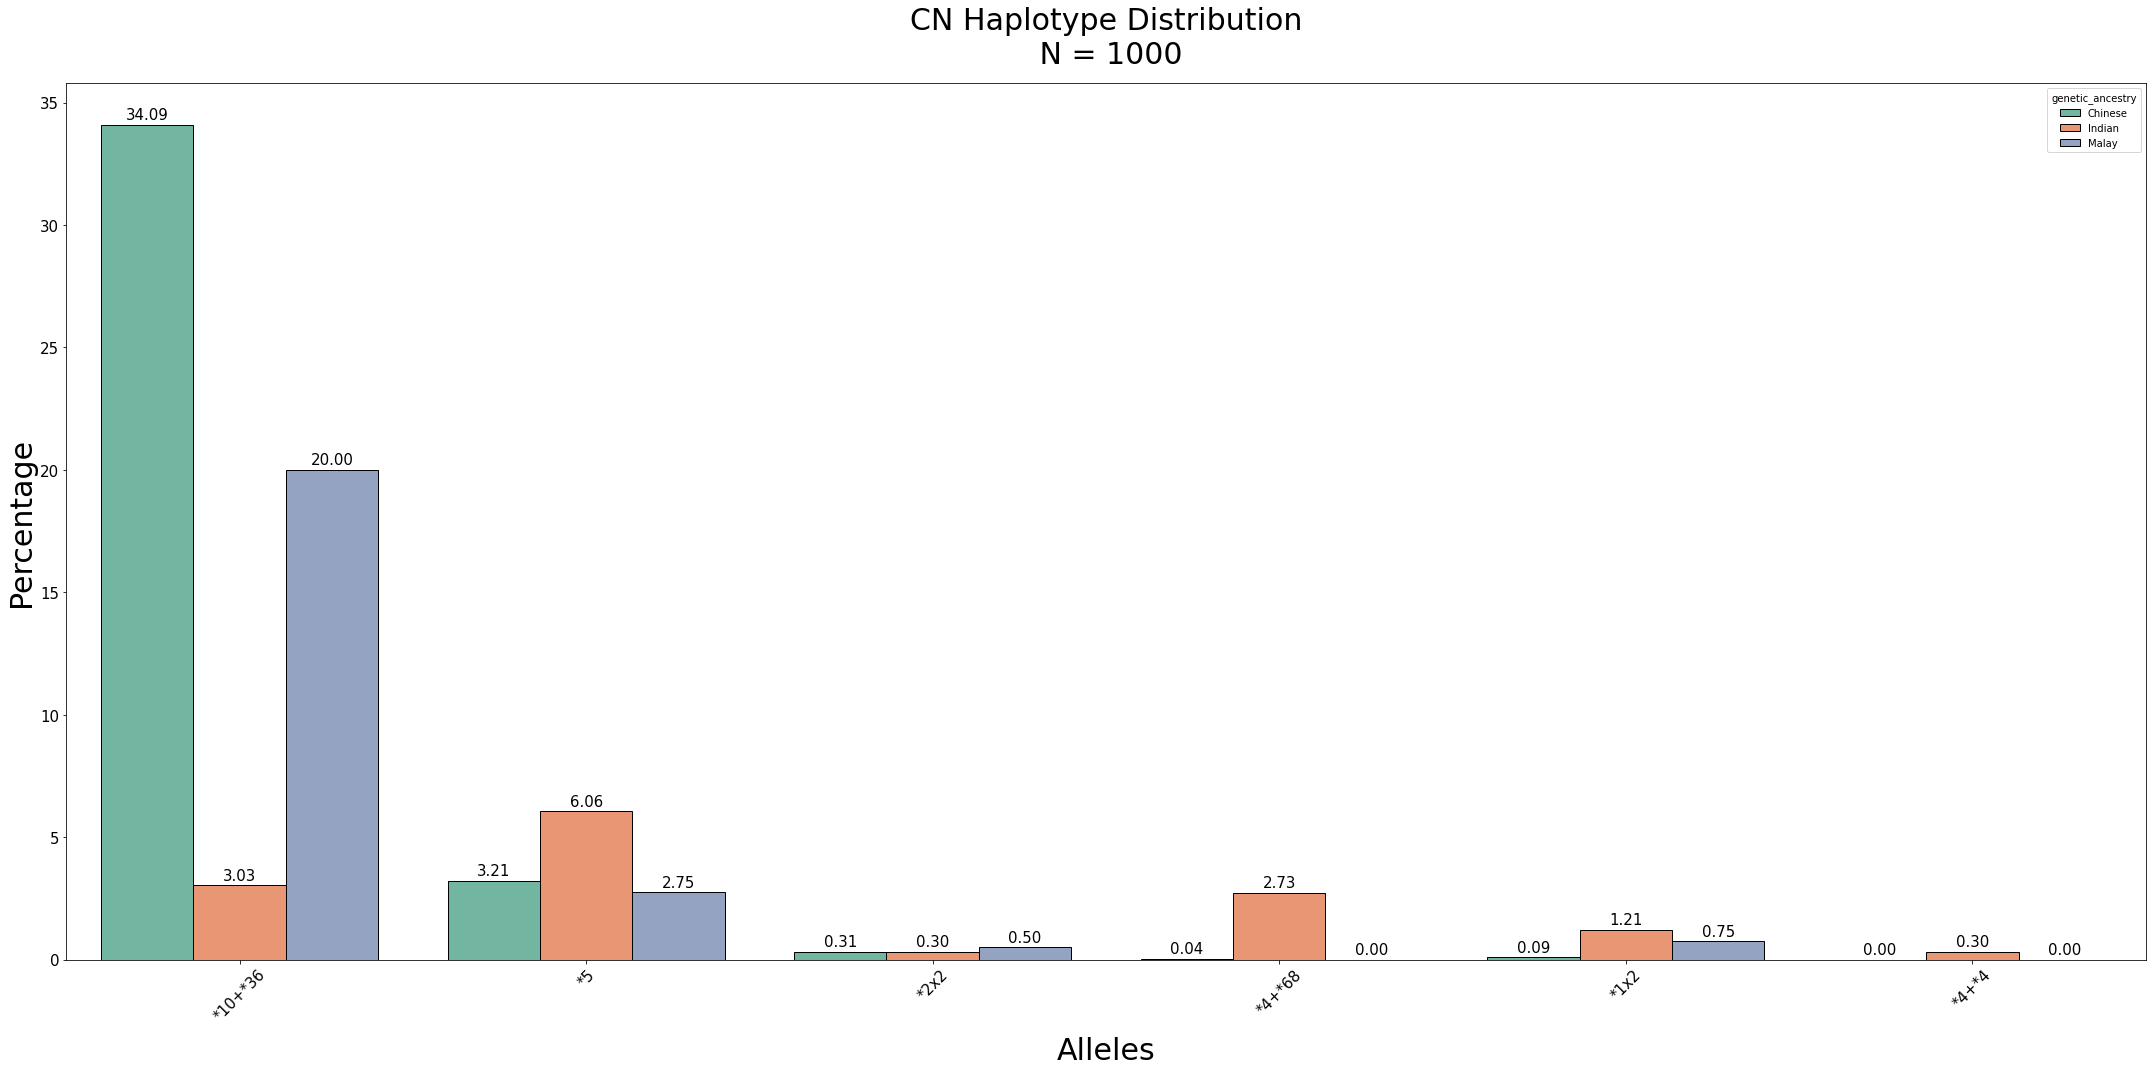

In [7]:
barplot_frequency(data = data, x_col= 'haplotype', y_col = 'percentage', xlabel = 'Alleles', ylabel = 'Percentage', title = f"CN Haplotype Distribution\n N = {cn_total}", figsize=(30, 15), 
                  fontsize=15, label_fontsize=30, title_fontsize=None, x_ticks_rotation=True, 
                  ylim=None, legend=None, color='#ADD8E6', ci=None, 
                  colored_xticks=False, color_col=None, hue= 'genetic_ancestry', palette= 'Set2', grid=False)

# 1.1 Pie chart of allele function proportion with or without CNV

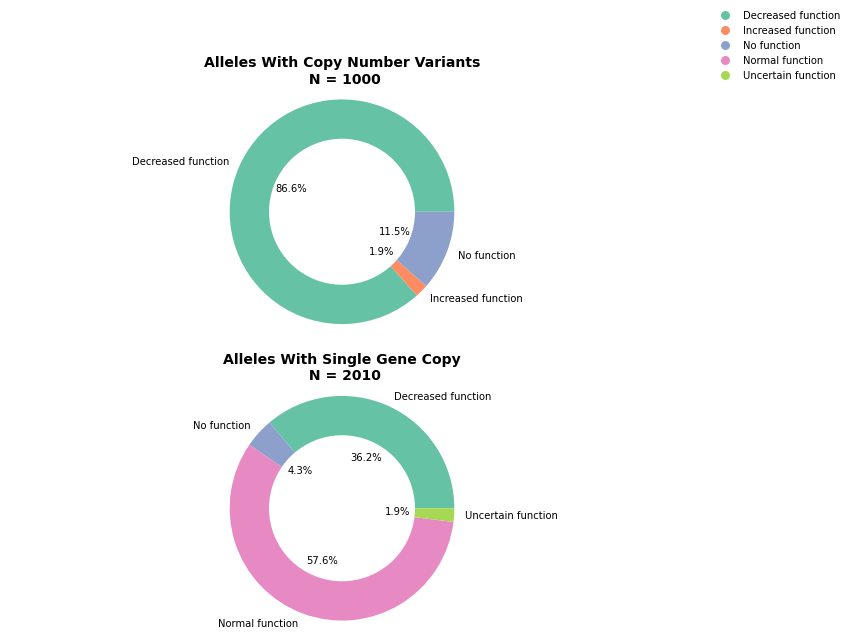

In [8]:
# Get unique labels from the 'function' column in haplotype_df
unique_labels = np.unique(haplotype_df['function'])

# Create a color palette and a dictionary to map labels to colors
colors = sns.color_palette("Set2", len(unique_labels))
label_color_map = dict(zip(sorted(unique_labels), colors))

# Create subplots
fig, axes = plt.subplots(2, figsize=(12, 10))
cnv_df = haplotype_df[haplotype_df['cnv'] == "Copy Number Variants"].groupby('function')['AC'].sum()
sc_df = haplotype_df[haplotype_df['cnv'] == "Single Copy"].groupby('function')['AC'].sum()

donut_chart(axes[0], data=cnv_df, title=f"Alleles With Copy Number Variants\n N = {cnv_df.sum()}", title_fontsize=14, startangle=0, label_color_map=label_color_map)
donut_chart(axes[1], data=sc_df, title=f"Alleles With Single Gene Copy\n N = {sc_df.sum()}", title_fontsize=14, startangle=0, label_color_map=label_color_map)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for label, color in label_color_map.items()]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=10, frameon=False)

# Adjust distance between plots
plt.subplots_adjust(wspace=0.3)

plt.show()


# 1.1 Pie chart of CNV alleles proportion 

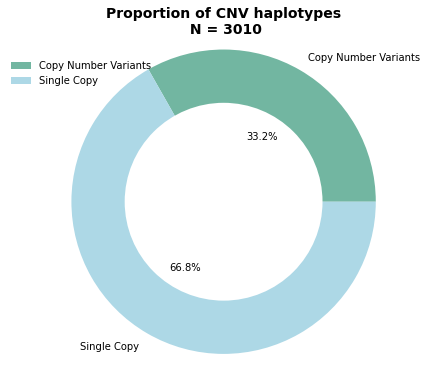

In [9]:
# Donut chart of CNV Haplotypes proportion in the dataset
colors = ['#72B6A1','#ADD8E6']
fig, ax = plt.subplots(figsize = (6, 6))
donut_chart(ax, data= haplotype_df.groupby('cnv')['AC'].sum(), title = f"Proportion of CNV haplotypes\n N = {haplotype_df['AC'].sum()}", title_fontsize = 14, startangle = 0, label_color_map = colors)
fig.legend(loc='upper left', bbox_to_anchor=(0, 0.85), fontsize=10, frameon=False)

# Phenotype distribution based on cnv

In [10]:
diplotype_df = pd.read_parquet('/home/jupyter-yusuf/Consensus/output/3_diplotypes.parquet')

In [11]:
diplotype_df['cnv'] = np.where(diplotype_df['diplotype'].str.contains('x') |
                      diplotype_df['diplotype'].str.contains('\+') |
                      diplotype_df['diplotype'].str.contains(r'\*5(?!\d+)'),
                      'Copy Number Variants',
                       'Single Copy')

diplotype_df.head()

,diplotype,AC,AF,AC_C,AF_C,AF_GA_C,AC_I,AF_I,AF_GA_I,AC_M,AF_M,AF_GA_M,AC_O,AF_O,AF_GA_O,activity_value,phenotype,cnv
0,*1/*10+*36,248,16.478405,223.0,14.817276,19.595782,2.0,0.132890,1.212121,23.0,1.528239,11.5,0.0,0.0,0.0,1.25,NM,Copy Number Variants
1,*10+*36/*10+*36,164,10.897010,152.0,10.099668,13.356766,1.0,0.066445,0.606061,11.0,0.730897,5.5,0.0,0.0,0.0,0.50,IM,Copy Number Variants
2,*10/*10+*36,152,10.099668,132.0,8.770764,11.599297,1.0,0.066445,0.606061,19.0,1.262458,9.5,0.0,0.0,0.0,0.50,IM,Copy Number Variants
3,*1/*1,119,7.906977,76.0,5.049834,6.678383,23.0,1.528239,13.939394,20.0,1.328904,10.0,0.0,0.0,0.0,2.00,NM,Single Copy
4,*1/*10,111,7.375415,77.0,5.116279,6.766257,2.0,0.132890,1.212121,32.0,2.126246,16.0,0.0,0.0,0.0,1.25,NM,Single Copy


# 2. Phenotype distribution of CNV diplotypes

/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


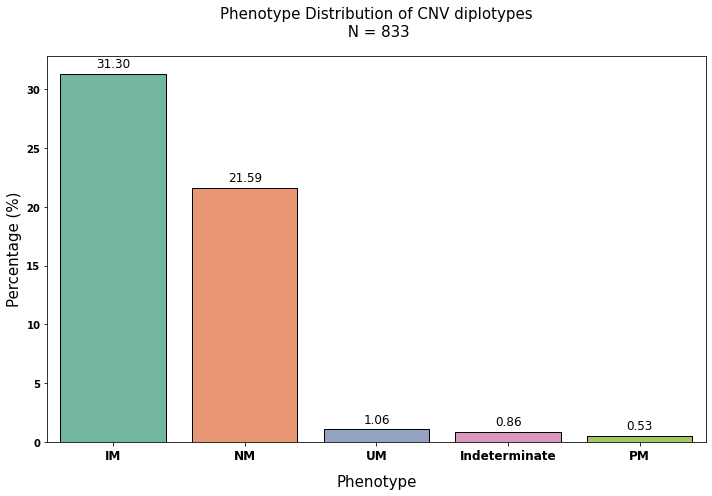

In [12]:
cnv_df = diplotype_df[diplotype_df['cnv'] == "Copy Number Variants"].groupby('phenotype')[['AC','AF']].sum().reset_index().sort_values(by='AF', ascending=False)
barplot_frequency(cnv_df,
                  x_col='phenotype', y_col='AF', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=f'Phenotype Distribution of CNV diplotypes\n N = {int(cnv_df["AC"].sum())}', 
                  figsize=(10, 7), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette='Set2',
                  grid=False, ci=None)

# 2.2 Phenotype distribution of CNV diplotypes amongst the genetic ancestry

In [13]:
data = pd.melt(diplotype_df, id_vars=['diplotype', 'phenotype', 'cnv'], value_vars=['AF_GA_C', 'AF_GA_I', 'AF_GA_M'], var_name='genetic_ancestry', value_name='percentage')
data = data.replace({'AF_GA_C': 'Chinese', 'AF_GA_I': 'Indian', 'AF_GA_M': 'Malay'})


In [14]:
cnv_data = data.query('cnv == "Copy Number Variants"').groupby(['phenotype', 'genetic_ancestry'])['percentage'].sum().reset_index().sort_values(by='percentage', ascending=False)

/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


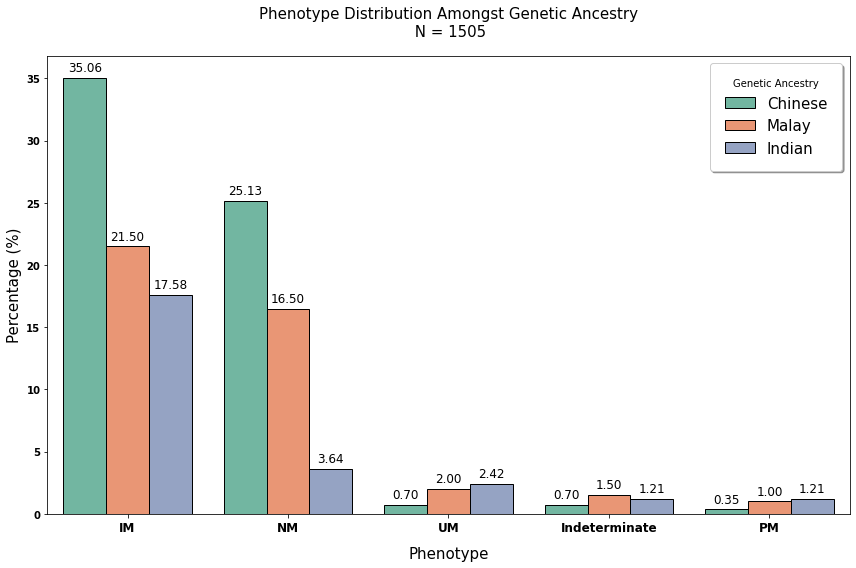

In [15]:
barplot_frequency(cnv_data,
                  x_col='phenotype', y_col='percentage', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=f'Phenotype Distribution Amongst Genetic Ancestry\n N = {int(diplotype_df["AC"].sum())}', 
                  figsize=(12, 8), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette='Set2',
                  grid=False, ci=None, hue = 'genetic_ancestry', legend='Genetic Ancestry')

# 3.1 Phenotype distribution of Non-CNV diplotypes

/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


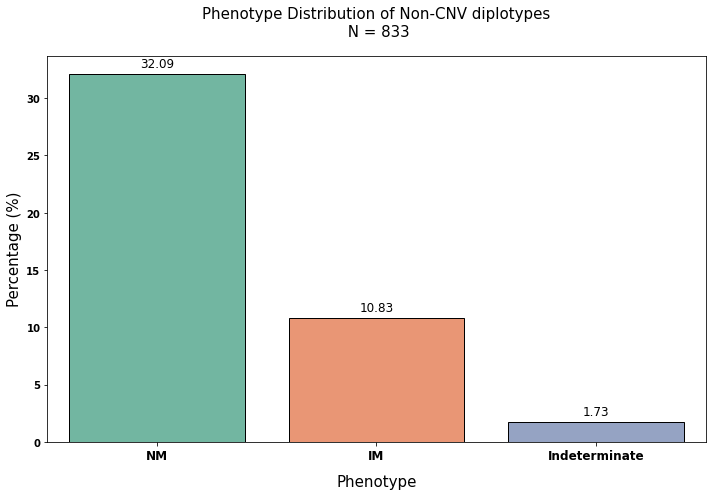

In [16]:
non_cnv_df = diplotype_df[diplotype_df['cnv'] == "Single Copy"].groupby('phenotype')[['AC','AF']].sum().reset_index().sort_values(by='AF', ascending=False)
barplot_frequency(non_cnv_df,
                  x_col='phenotype', y_col='AF', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=f'Phenotype Distribution of Non-CNV diplotypes\n N = {int(cnv_df["AC"].sum())}', 
                  figsize=(10, 7), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette='Set2',
                  grid=False, ci=None)

# 3.1 Phenotype distribution of Non-CNV diplotypes amongst genetic ancestries

/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


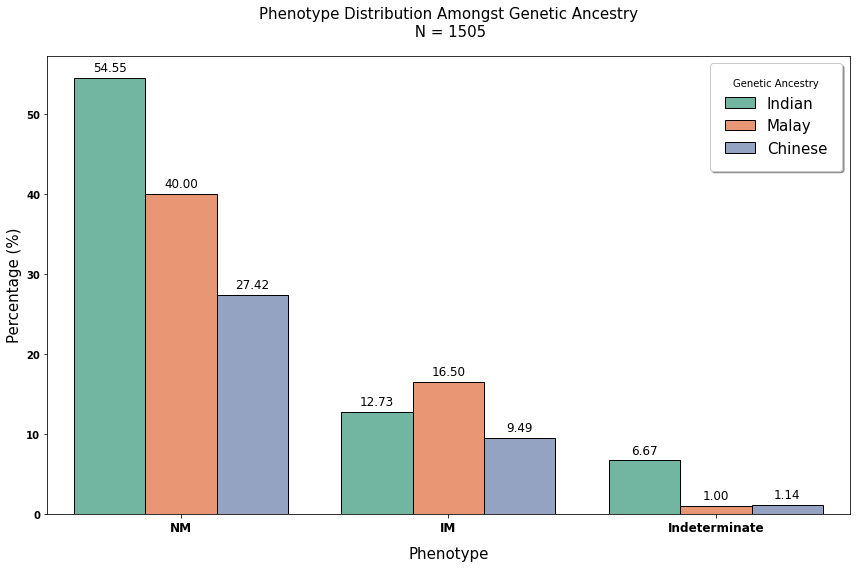

In [17]:
non_cnv_data = data.query('cnv == "Single Copy"').groupby(['phenotype', 'genetic_ancestry'])['percentage'].sum().reset_index().sort_values(by='percentage', ascending=False)
barplot_frequency(non_cnv_data,
                  x_col='phenotype', y_col='percentage', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=f'Phenotype Distribution Amongst Genetic Ancestry\n N = {int(diplotype_df["AC"].sum())}', 
                  figsize=(12, 8), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette='Set2',
                  grid=False, ci=None, hue = 'genetic_ancestry', legend='Genetic Ancestry')

In [48]:
import seaborn as sns
import matplotlib.colors as mcolors

set2_palette = sns.color_palette('Pastel1', 8)  # Replace 8 with desired number of colors

# Convert RGB color values to Hex color values
set2_palette_hex = [mcolors.rgb2hex(color) for color in set2_palette]

# Create a string representation of the list
set2_palette_hex_str = ', '.join(f'"{code}"' for code in set2_palette_hex)

print(f"[{set2_palette_hex_str}]")


["#fbb4ae", "#b3cde3", "#ccebc5", "#decbe4", "#fed9a6", "#ffffcc", "#e5d8bd", "#fddaec"]


# 4. Phenotype Donut graph

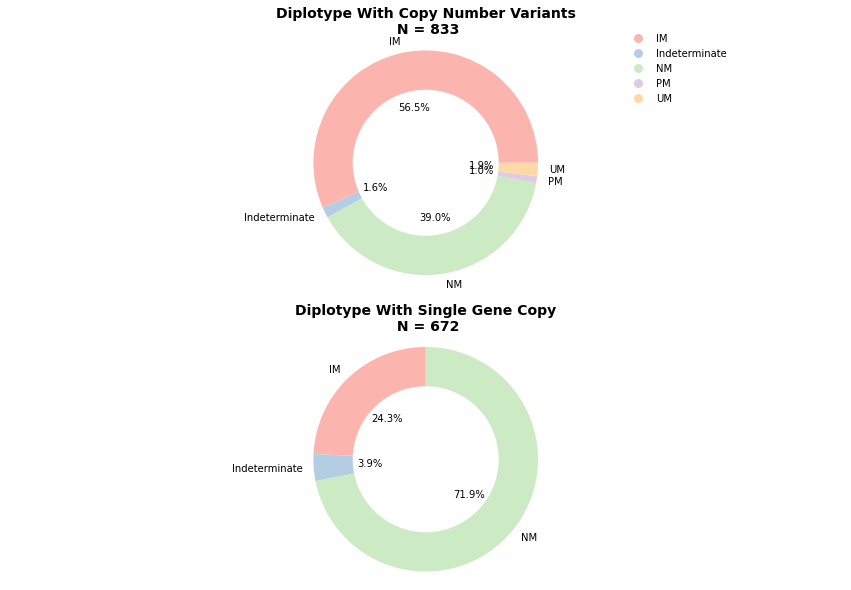

In [47]:
# Get unique labels from the 'phenotype' column in diplotype_df
unique_labels = np.unique(diplotype_df['phenotype'])

# Create a color palette and a dictionary to map labels to colors
colors = sns.color_palette("Pastel1", len(unique_labels))
# colors = ["#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3b3"]
label_color_map = dict(zip(sorted(unique_labels), colors))

# Create subplots
fig, axes = plt.subplots(2, figsize=(15, 10))
cnv_df = diplotype_df[diplotype_df['cnv'] == "Copy Number Variants"].groupby('phenotype')['AC'].sum()
sc_df = diplotype_df[diplotype_df['cnv'] == "Single Copy"].groupby('phenotype')['AC'].sum()

donut_chart(axes[0], data=cnv_df, title=f"Diplotype With Copy Number Variants\n N = {cnv_df.sum()}", title_fontsize=14, startangle=0, label_color_map=label_color_map)
donut_chart(axes[1], data=sc_df, title=f"Diplotype With Single Gene Copy\n N = {sc_df.sum()}", title_fontsize=14, startangle=90, label_color_map=label_color_map)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for label, color in label_color_map.items()]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.8, 0.9), fontsize=10, frameon=False)

# Adjust distance between plots
plt.subplots_adjust(wspace=0.3)

plt.show()


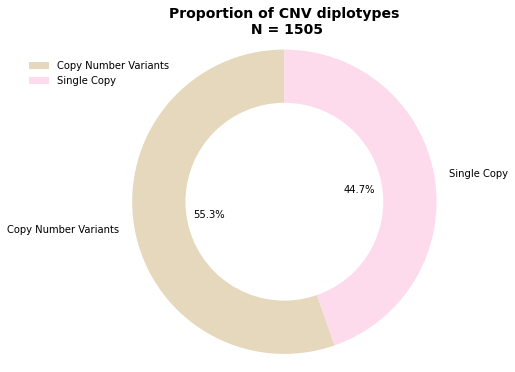

In [49]:
# Donut chart of CNV Haplotypes proportion in the dataset
colors = ["#e5d8bd", "#fddaec"]
fig, ax = plt.subplots(figsize = (6, 6))
donut_chart(ax, data= diplotype_df.groupby('cnv')['AC'].sum(), title = f"Proportion of CNV diplotypes\n N = {diplotype_df['AC'].sum()}", title_fontsize = 14, startangle = 90, label_color_map = colors)
fig.legend(loc='upper left', bbox_to_anchor=(-0.1, 0.85), fontsize=10, frameon=False)

In [20]:
diplotype_df[diplotype_df['diplotype'].str.contains('x')]

,diplotype,AC,AF,AC_C,AF_C,AF_GA_C,AC_I,AF_I,AF_GA_I,AC_M,AF_M,AF_GA_M,AC_O,AF_O,AF_GA_O,activity_value,phenotype,cnv
22,*1/*1x2,7,0.465116,1.0,0.066445,0.087873,3.0,0.199336,1.818182,3.0,0.199336,1.5,0.0,0.0,0.0,3.00,UM,Copy Number Variants
29,*1/*2x2,5,0.332226,4.0,0.265781,0.351494,1.0,0.066445,0.606061,0.0,0.000000,0.0,0.0,0.0,0.0,3.00,UM,Copy Number Variants
48,*2/*2x2,2,0.132890,2.0,0.132890,0.175747,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.00,UM,Copy Number Variants
64,*2x2/*41,1,0.066445,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.066445,0.5,0.0,0.0,0.0,2.50,UM,Copy Number Variants
74,*2x2/*10,1,0.066445,1.0,0.066445,0.087873,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.25,NM,Copy Number Variants
77,*2x2/*71,1,0.066445,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.066445,0.5,0.0,0.0,0.0,NaN,Indeterminate,Copy Number Variants
85,*1x2/*41,1,0.066445,1.0,0.066445,0.087873,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.50,UM,Copy Number Variants
87,*1x2/*4,1,0.066445,0.0,0.000000,0.000000,1.0,0.066445,0.606061,0.0,0.000000,0.0,0.0,0.0,0.0,2.00,NM,Copy Number Variants


# Adding CN column 
Number of cnv

methods:
- Counting the number of star alleles
- *5 equals to 0 CN
- *1x2 equals to 3 CN

In [21]:
def calculate_cn(diplotype):
    star_count = diplotype.count('*')
    five_count = diplotype.count('*5')
    x_count = diplotype.count('x')
    return star_count - five_count + x_count

In [50]:
diplotype_df['CN'] = diplotype_df['diplotype'].apply(calculate_cn)
diplotype_df.head()

,diplotype,AC,AF,AC_C,AF_C,AF_GA_C,AC_I,AF_I,AF_GA_I,AC_M,AF_M,AF_GA_M,AC_O,AF_O,AF_GA_O,activity_value,phenotype,cnv,CN
0,*1/*10+*36,248,16.478405,223.0,14.817276,19.595782,2.0,0.132890,1.212121,23.0,1.528239,11.5,0.0,0.0,0.0,1.25,NM,Copy Number Variants,3
1,*10+*36/*10+*36,164,10.897010,152.0,10.099668,13.356766,1.0,0.066445,0.606061,11.0,0.730897,5.5,0.0,0.0,0.0,0.50,IM,Copy Number Variants,4
2,*10/*10+*36,152,10.099668,132.0,8.770764,11.599297,1.0,0.066445,0.606061,19.0,1.262458,9.5,0.0,0.0,0.0,0.50,IM,Copy Number Variants,3
3,*1/*1,119,7.906977,76.0,5.049834,6.678383,23.0,1.528239,13.939394,20.0,1.328904,10.0,0.0,0.0,0.0,2.00,NM,Single Copy,2
4,*1/*10,111,7.375415,77.0,5.116279,6.766257,2.0,0.132890,1.212121,32.0,2.126246,16.0,0.0,0.0,0.0,1.25,NM,Single Copy,2


In [51]:
diplotype_df.query('diplotype == "*10+*36/*10+*36"')

,diplotype,AC,AF,AC_C,AF_C,AF_GA_C,AC_I,AF_I,AF_GA_I,AC_M,AF_M,AF_GA_M,AC_O,AF_O,AF_GA_O,activity_value,phenotype,cnv,CN
1,*10+*36/*10+*36,164,10.89701,152.0,10.099668,13.356766,1.0,0.066445,0.606061,11.0,0.730897,5.5,0.0,0.0,0.0,0.5,IM,Copy Number Variants,4


In [53]:
diplotype_df

,diplotype,AC,AF,AC_C,AF_C,AF_GA_C,AC_I,AF_I,AF_GA_I,AC_M,AF_M,AF_GA_M,AC_O,AF_O,AF_GA_O,activity_value,phenotype,cnv,CN
0,*1/*10+*36,248,16.478405,223.0,14.817276,19.595782,2.0,0.132890,1.212121,23.0,1.528239,11.5,0.0,0.0,0.0,1.25,NM,Copy Number Variants,3
1,*10+*36/*10+*36,164,10.897010,152.0,10.099668,13.356766,1.0,0.066445,0.606061,11.0,0.730897,5.5,0.0,0.0,0.0,0.50,IM,Copy Number Variants,4
2,*10/*10+*36,152,10.099668,132.0,8.770764,11.599297,1.0,0.066445,0.606061,19.0,1.262458,9.5,0.0,0.0,0.0,0.50,IM,Copy Number Variants,3
3,*1/*1,119,7.906977,76.0,5.049834,6.678383,23.0,1.528239,13.939394,20.0,1.328904,10.0,0.0,0.0,0.0,2.00,NM,Single Copy,2
4,*1/*10,111,7.375415,77.0,5.116279,6.766257,2.0,0.132890,1.212121,32.0,2.126246,16.0,0.0,0.0,0.0,1.25,NM,Single Copy,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,*10/*75,1,0.066445,1.0,0.066445,0.087873,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,Indeterminate,Single Copy,2
90,*4/*82,1,0.066445,0.0,0.000000,0.000000,1.0,0.066445,0.606061,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,Indeterminate,Single Copy,2
91,*1/*17,1,0.066445,0.0,0.000000,0.000000,1.0,0.066445,0.606061,0.0,0.000000,0.0,0.0,0.0,0.0,1.50,NM,Single Copy,2
92,*2/*14,1,0.066445,1.0,0.066445,0.087873,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.50,NM,Single Copy,2


In [59]:
diplotype_df['AC'].sum()

1505

Text(0.5, 0, 'Copy Number')

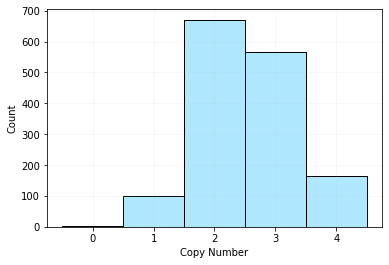

In [57]:
sns.histplot(diplotype_df[['CN', 'AC']], x='CN', weights='AC', bins=20, discrete=True, color='#94DFFF')
plt.grid(alpha=0.1)
plt.xlabel('Copy Number')

Text(0.5, 0, 'Copy Number')

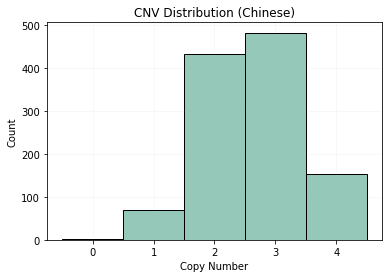

In [67]:
# Chinese
sns.histplot(diplotype_df[['CN', 'AC_C']], x='CN', weights='AC_C', bins=20, discrete=True, color='#72B6A1')
plt.title('CNV Distribution (Chinese)')
plt.grid(alpha=0.1)
plt.xlabel('Copy Number')

Text(0.5, 0, 'Copy Number')

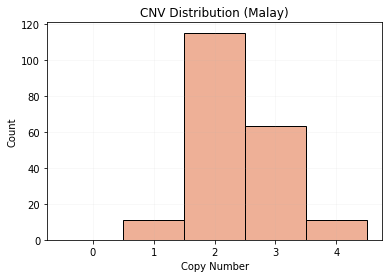

In [69]:
# Chinese
sns.histplot(diplotype_df[['CN', 'AC_M']], x='CN', weights='AC_M', bins=20, discrete=True, color='#E99675')
plt.title('CNV Distribution (Malay)')

plt.grid(alpha=0.1)
plt.xlabel('Copy Number')

Text(0.5, 0, 'Copy Number')

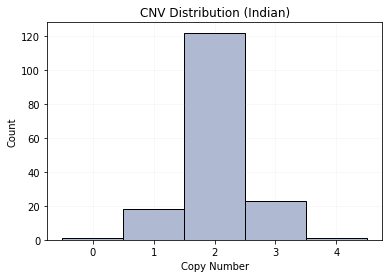

In [71]:
# Chinese
sns.histplot(diplotype_df[['CN', 'AC_I']], x='CN', weights='AC_I', bins=20, discrete=True, color='#95A3C3')
plt.title('CNV Distribution (Indian)')
plt.grid(alpha=0.1)
plt.xlabel('Copy Number')

Text(0.5, 0, 'Copy Number')

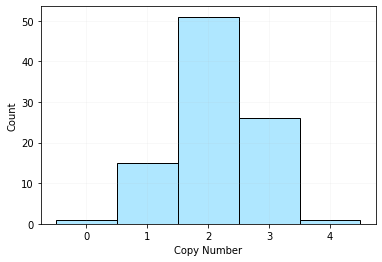

In [52]:
sns.histplot(diplotype_df['CN'].value_counts().reset_index(), x='index', weights='CN', bins=20, discrete=True, color='#94DFFF')
plt.grid(alpha=0.1)
plt.xlabel('Copy Number')

In [ ]:
diplotype_df['CN'].value_counts()

2    51
3    26
1    15
4     1
0     1
Name: CN, dtype: int64

# Table frequency
# Restructure the graph